# VALIDATING ON NO_MMR LEADS

In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import swifter
tqdm.pandas()

In [2]:
va_df = pd.read_csv('mca-ner-validation.csv', index_col=0)

In [3]:
va_df

,link,source,id,status,data
33241,https://orangecounty.craigslist.org/cto/d/yorb...,CRAIGSLIST,21ce03bf-9b4e-4c3a-bcbc-7683e8a644bd,NO_MMR,2010 bmw x5\ncondition: excellent cylinders: 8...
53108,https://losangeles.craigslist.org/lac/cto/d/lo...,CRAIGSLIST,6aff3eb2-b25a-419f-ab93-5810f2522115,NO_MMR,2007 2007 hummer h2\ncondition: good drive: 4w...
22039,https://losangeles.craigslist.org/lgb/cto/d/co...,CRAIGSLIST,46d487cf-feb3-4032-b14a-c30e54b48d0d,NO_MMR,2008 2008 Nissan/UD2600\nfuel: diesel odometer...
11051,https://losangeles.craigslist.org/lac/cto/d/lo...,CRAIGSLIST,61c8b1a2-30e7-4894-a1b6-fd2c6efda1a0,NO_MMR,2011 2011 mercedes c300\nfuel: gas odometer: 1...
27932,https://orangecounty.craigslist.org/cto/d/miss...,CRAIGSLIST,e9a7806a-b7c9-49ea-a3ed-526f69cab6b0,NO_MMR,2011 Cadillac srx4\ncondition: good cylinders:...
...,...,...,...,...,...
39638,https://phoenix.craigslist.org/nph/cto/d/glend...,CRAIGSLIST,263f88ab-ce1e-4d7f-bc37-0df8c41c61cd,NO_MMR,2015 range rover supercharged\ncondition: exce...
64857,https://phoenix.craigslist.org/wvl/cto/d/goody...,CRAIGSLIST,b55758a3-02a4-441c-8e0c-7c2d8eb4f609,NO_MMR,2011 gmc yukon slt\ncondition: good drive: 4wd...
2263,https://phoenix.craigslist.org/nph/cto/d/phoen...,CRAIGSLIST,ac011a1f-f1c3-45c7-a9c1-f08e119f0d58,NO_MMR,2006 toyota sequoia sr5 4x4\ncondition: good c...
9966,https://phoenix.craigslist.org/evl/cto/d/2009-...,CRAIGSLIST,997bc8ee-bcd4-407a-9df6-ad2d39a60733,NO_MMR,2009 Audi A3 Wagon\ncondition: excellent cylin...


In [4]:
def predict(posting):
    pload = {
        'posting': posting
    }
    r = requests.post('http://127.0.0.1:8000/NER', json=pload)
    return r.json()

In [5]:
postings = list(va_df['data'][:50])

In [6]:
postings[0]

'2010 bmw x5\ncondition: excellent cylinders: 8 cylinders drive: 4wd fuel: gas odometer: 89000 paint color: black title status: clean transmission: automatic type: SUV\nSelling a 2010 BMW X5 \n4.8L V8\nxDrive48i AWD 4dr SUV\n89k miles -Clean title in hand - Absolutely in great condition in and out ( please see the pictures)- Run flat tires almost new - just passed the smog- drives great- Your mechanic well comes to check it as well.\n\n\nPRICED TO SELL , WILL SELL TO TO FIRST CASH.\n\n*serious buyers please *"NO LOW BALLERS"\nPlease don\'t email , I don\'t check email often.\nCall or Text : 9four9 254 5465\nThanks.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'

In [9]:
temp_df = va_df.head(200)
temp_df['prediction'] = temp_df['data'].progress_apply(predict)

100%|██████████| 200/200 [04:58<00:00,  1.49s/it]
<ipython-input-9-5363abcc839d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['prediction'] = temp_df['data'].progress_apply(predict)


In [32]:
def get_success(prediction):
    if prediction.get('result').get('result') == 'TOO FEW INFORMATION':
        return 0
    else:
        return 1
def get_confidence(prediction):
    confidence = prediction['result'].get('AVERAGE_CONFIDENCE')
    if confidence == None:
        confidence = prediction['result'].get('HIGHEST_CONFIDENCE')
    return confidence
def get_std(prediction):
    return prediction['result']['STD']

In [33]:
temp_df[['prediction']]

,prediction
33241,"{'prediction.entities': {'MAKE': 'bmw', 'MODEL..."
53108,"{'prediction.entities': {'MAKE': 'hummer', 'MO..."
22039,"{'prediction.entities': {'MAKE': 'Nissan', 'MO..."
11051,"{'prediction.entities': {'MAKE': 'mercedes', '..."
27932,"{'prediction.entities': {'MAKE': 'Cadillac', '..."
...,...
45808,"{'prediction.entities': {'MAKE': 'mini', 'MODE..."
38516,"{'prediction.entities': {'MAKE': 'bmw', 'MODEL..."
60902,"{'prediction.entities': {'MAKE': 'subaru', 'YE..."
54871,"{'prediction.entities': {'MAKE': 'bmw', 'MODEL..."


In [34]:
temp_df['success'] = temp_df['prediction'].progress_apply(get_success)
temp_df['confidence'] = temp_df['prediction'].progress_apply(get_confidence)
temp_df['std'] = temp_df['prediction'].progress_apply(get_std)

100%|██████████| 200/200 [00:00<00:00, 244779.92it/s]
<ipython-input-34-2d55ecda2f5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['success'] = temp_df['prediction'].progress_apply(get_success)
100%|██████████| 200/200 [00:00<00:00, 279806.80it/s]
<ipython-input-34-2d55ecda2f5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['confidence'] = temp_df['prediction'].progress_apply(get_confidence)
100%|██████████| 200/200 [00:00<00:00, 346636.69it/s]
<ipython-input-34-2d55ecda2f5d>:3: Setti

In [37]:
score_df = temp_df[['success', 'std', 'confidence']]

In [38]:
score_df

,success,std,confidence
33241,0,1.689408e-08,0.770426
53108,1,1.549678e-02,0.928239
22039,0,1.774420e-02,0.759324
11051,1,8.697920e-04,0.847597
27932,0,3.076861e-03,0.717539
...,...,...,...
45808,1,9.969820e-03,0.850126
38516,0,3.314183e-02,0.716385
60902,0,1.461545e-02,0.788317
54871,0,1.062047e-08,0.754189


In [39]:
score_df[score_df['success'] == 0].describe()

,success,std,confidence
count,67.0,67.000000,67.000000
mean,0.0,0.011412,0.717564
std,0.0,0.009855,0.073246
min,0.0,0.000000,0.516672
25%,0.0,0.002927,0.664562
50%,0.0,0.009421,0.736354
75%,0.0,0.015657,0.775636
max,0.0,0.038555,0.799255


In [40]:
score_df[score_df['success'] == 1].describe()

,success,std,confidence
count,133.0,133.000000,133.000000
mean,1.0,0.007123,0.874942
std,0.0,0.006271,0.039566
min,1.0,0.000000,0.806262
25%,1.0,0.002445,0.844455
50%,1.0,0.006136,0.873137
75%,1.0,0.010196,0.908582
max,1.0,0.043052,0.965009


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.dpi':300}, font_scale=0.5)
plt.rcParams['figure.figsize']=(3,2)

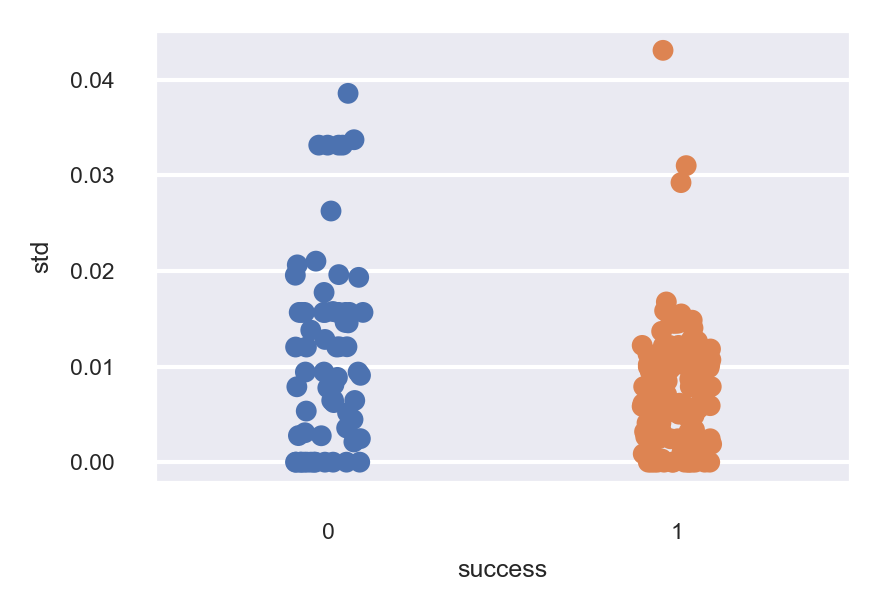

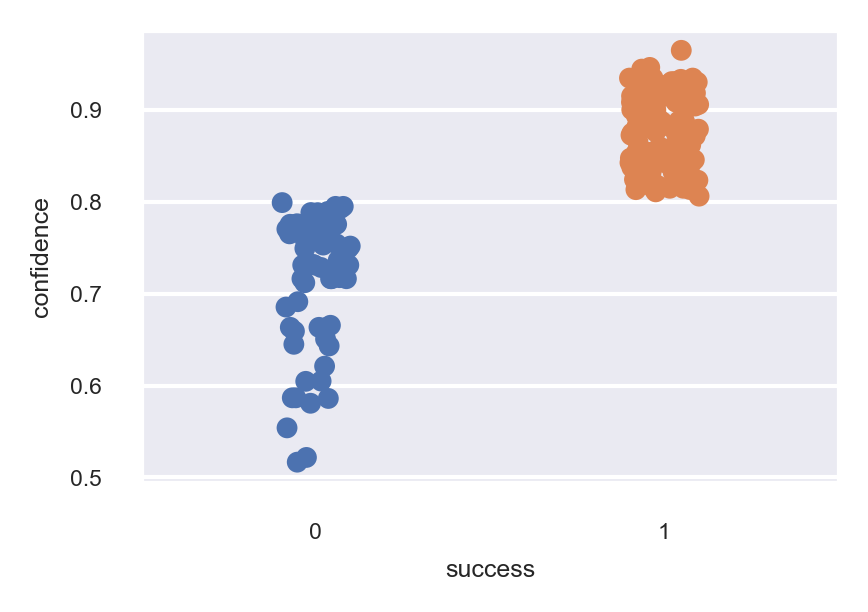

In [42]:
sns.stripplot(x='success', y='std',data=score_df)
plt.show()
sns.stripplot(x='success', y='confidence',data=score_df)
plt.show()

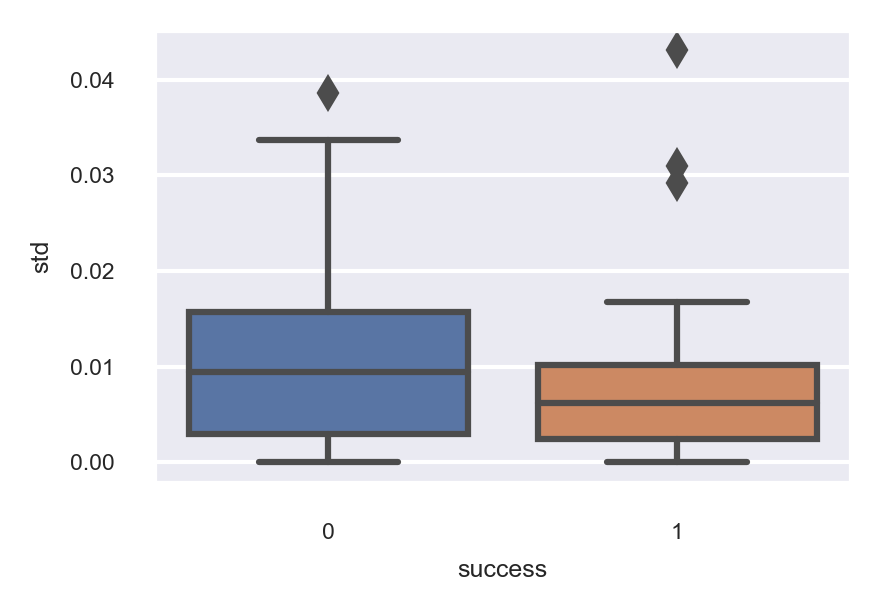

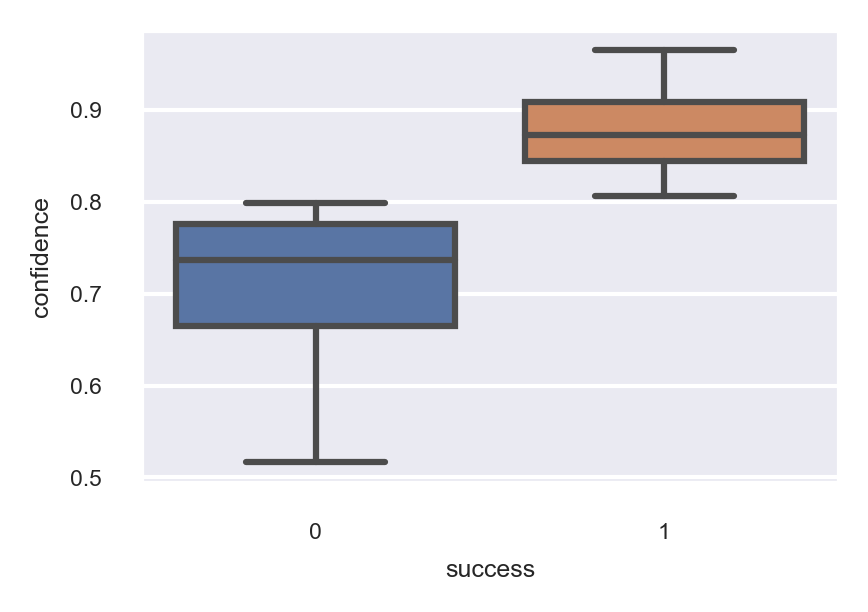

In [43]:
sns.boxplot(x='success', y='std',data=score_df)
plt.show()
sns.boxplot(x='success', y='confidence',data=score_df)
plt.show()